# Data Preprocessing

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.model_selection import KFold, cross_val_score, train_test_split

from sklearn.neighbors import KNeighborsClassifier     #KNN
from sklearn.linear_model import LogisticRegression    #Logistic Regression
from sklearn.tree import DecisionTreeClassifier        #Decision Tree
from sklearn.ensemble import RandomForestClassifier    #Random Forest
from sklearn.neural_network import MLPClassifier       #Neural Network
from sklearn.svm import SVC                            #SVM
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score

In [2]:
path1 = os.getcwd()
bc_data = path1 + '/' + 'bc_data.csv'

In [3]:
bc_data = pd.read_csv(bc_data)

In [4]:
bc_data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [5]:
bc_data.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis'],
      dtype='object')

In [6]:
# Splitting data into testing and training set - 30% for testing

X_train, X_test, Y_train, Y_test = train_test_split(bc_data.iloc[:,:-1], bc_data['diagnosis'], test_size = 0.3)

In [7]:
X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
370,16.35,23.29,109.00,840.4,0.09742,0.14970,0.181100,0.087730,0.2175,0.06218,...,19.38,31.03,129.30,1165.0,0.14150,0.46650,0.708700,0.224800,0.4824,0.09614
423,13.66,19.13,89.46,575.3,0.09057,0.11470,0.096570,0.048120,0.1848,0.06181,...,15.14,25.50,101.40,708.8,0.11470,0.31670,0.366000,0.140700,0.2744,0.08839
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.12380,0.18660,0.241600,0.186000,0.2750,0.08902
153,11.15,13.08,70.87,381.9,0.09754,0.05113,0.019820,0.017860,0.1830,0.06105,...,11.99,16.30,76.25,440.8,0.13410,0.08971,0.071160,0.055060,0.2859,0.06772
517,19.89,20.26,130.50,1214.0,0.10370,0.13100,0.141100,0.094310,0.1802,0.06188,...,23.73,25.23,160.50,1646.0,0.14170,0.33090,0.418500,0.161300,0.2549,0.09136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,13.43,19.63,85.84,565.4,0.09048,0.06288,0.058580,0.034380,0.1598,0.05671,...,17.98,29.87,116.60,993.6,0.14010,0.15460,0.264400,0.116000,0.2884,0.07371
320,10.25,16.18,66.52,324.2,0.10610,0.11110,0.067260,0.039650,0.1743,0.07279,...,11.28,20.61,71.53,390.4,0.14020,0.23600,0.189800,0.097440,0.2608,0.09702
435,13.98,19.62,91.12,599.5,0.10600,0.11330,0.112600,0.064630,0.1669,0.06544,...,17.04,30.80,113.90,869.3,0.16130,0.35680,0.406900,0.182700,0.3179,0.10550
178,13.01,22.22,82.01,526.4,0.06251,0.01938,0.001595,0.001852,0.1395,0.05234,...,14.00,29.02,88.18,608.8,0.08125,0.03432,0.007977,0.009259,0.2295,0.05843


In [8]:
Y_naive_pred = (X_test['radius_mean'] > np.mean(X_test['radius_mean'])).astype(int).values

In [9]:
Y_naive_pred

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [10]:
Y_naive_pred.shape

(171,)

In [11]:
bc_data['radius_mean']

0      17.99
1      20.57
2      19.69
3      11.42
4      20.29
       ...  
564    21.56
565    20.13
566    16.60
567    20.60
568     7.76
Name: radius_mean, Length: 569, dtype: float64

In [12]:
len(Y_test)/(len(Y_train) + len(Y_test))*100

30.052724077328648

In [13]:
# Apply standard scaling to ensure no feature dominates (over others)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Question: why standard scaling needs to be applied for X_train and X_test (but not Y)

In [14]:
X_train.shape

(398, 30)

# Modeling

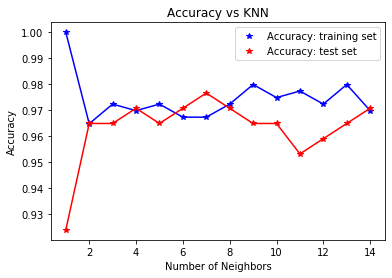

In [15]:
#KNN classifier
train_accuracy = []
test_accuracy = []

#try KNN for different k nearest neighbor from 1 to 15
neighbors_setting = range(1,15)

for n_n in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_n)
    knn.fit(X_train,Y_train)
    train_accuracy.append(knn.score(X_train, Y_train))
    test_accuracy.append(knn.score(X_test, Y_test))

plt.plot(neighbors_setting,train_accuracy,'b*', label='Accuracy: training set')
plt.plot(neighbors_setting,train_accuracy,'b')

plt.plot(neighbors_setting,test_accuracy,'r*',label='Accuracy: test set')
plt.plot(neighbors_setting,test_accuracy,'r')
plt.title("Accuracy vs KNN")

plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()
#plt.savefig('7.png',facecolor='w')


In [16]:
print("Accuracy of the training set for 5NN: {:.3f}".format(train_accuracy[4]))
print("Accuracy of the test set for 5NN: {:.3f}".format(test_accuracy[4]))

Accuracy of the training set for 5NN: 0.972
Accuracy of the test set for 5NN: 0.965


Accuracy on the training set: 0.990
Accuracy on the test set: 0.959
[[111   4]
 [  3  53]]


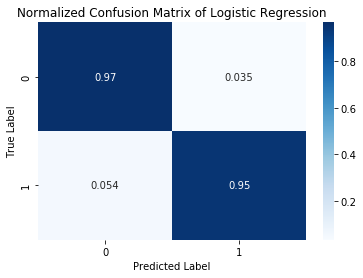

In [17]:
#Logistic Regression

logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, Y_train)

print('Accuracy on the training set: {:.3f}'.format(logistic_reg.score(X_train,Y_train)))
print('Accuracy on the test set: {:.3f}'.format(logistic_reg.score(X_test,Y_test)))


# feeding the training data into the model
logistic_reg.fit(X_train, Y_train)

# predicting the test set results
Y_pred = logistic_reg.predict(X_test)

# confusion matrix 
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

sum_mat1 = np.sum(cm, axis=1)
cm1 = cm/sum_mat1[:,None]
sns.heatmap(cm1, annot=True, cmap="Blues")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix of Logistic Regression")
plt.savefig('8.png',facecolor='w')
plt.show()

# In the confusion matrix, 1 represents malignant and 0 represents benign. 
# so, the confusion matrix is  [[True negative, False Positive]
#                                [False negative, True Positive]]

In [18]:
#print(classification_report(Y_pred, Y_test))
print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

           0       0.97      0.97      0.97       115
           1       0.93      0.95      0.94        56

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.95       171
weighted avg       0.96      0.96      0.96       171



In [19]:
cm1_p = confusion_matrix(Y_test, Y_naive_pred)

In [20]:
cm1_p

array([[93, 22],
       [ 7, 49]])

In [21]:
#print(classification_report(Y_naive_pred, Y_test))
print(classification_report(Y_test, Y_naive_pred))


              precision    recall  f1-score   support

           0       0.93      0.81      0.87       115
           1       0.69      0.88      0.77        56

    accuracy                           0.83       171
   macro avg       0.81      0.84      0.82       171
weighted avg       0.85      0.83      0.83       171



In [22]:
Y_pred.shape

(171,)

In [23]:
X_test

array([[ 7.68168974e-01,  1.04145521e+00,  8.52335674e-01, ...,
         1.78854493e+00,  3.18074496e+00,  6.13495524e-01],
       [-3.41407658e-02,  4.57833265e-02,  4.13042272e-04, ...,
         4.61675621e-01, -2.22787454e-01,  2.11542232e-01],
       [ 2.02681102e+00, -2.79724788e-01,  1.89434954e+00, ...,
         1.17638644e+00, -2.12969572e-01,  2.44217145e-01],
       ...,
       [ 6.13012850e-02,  1.63061985e-01,  7.27872270e-02, ...,
         1.12432141e+00,  4.89008988e-01,  1.09895137e+00],
       [-2.28007431e-01,  7.85356910e-01, -3.24398811e-01, ...,
        -1.61210594e+00, -9.57492287e-01, -1.34233140e+00],
       [-1.07207307e+00, -3.37167396e-01, -1.06078434e+00, ...,
        -8.78604382e-01,  2.86106094e-01,  1.89758957e-01]])

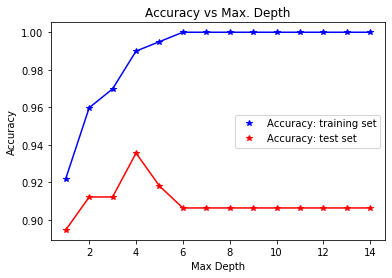

In [24]:
#Decision Tree
train_accuracy = []
test_accuracy = []

max_dep = range(1,15)

for m1 in max_dep:
    tree = DecisionTreeClassifier(max_depth=m1,random_state=0)
    tree.fit(X_train,Y_train)
    train_accuracy.append(tree.score(X_train, Y_train))
    test_accuracy.append(tree.score(X_test, Y_test))

plt.plot(max_dep,train_accuracy,'b*', label='Accuracy: training set')
plt.plot(neighbors_setting,train_accuracy,'b')

plt.plot(neighbors_setting,test_accuracy,'r*',label='Accuracy: test set')
plt.plot(neighbors_setting,test_accuracy,'r')
plt.title("Accuracy vs Max. Depth")


plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend()
#plt.savefig('9.png',facecolor='w')


By having larger max_depth (> 5), the model is overfit into training data. The accuracy for the training set increased but the accuracy for the test set decreased.

Other parameters which could be included:
   - min_samples_leaf, max_sample_leaf
   - max_leaf_node
   
The accuracy is highest for both the set when maximum depth is 4.

In [25]:
print("Accuracy of the training set for Decision Tree: {:.3f}".format(train_accuracy[4]))
print("Accuracy of the test set for Decision Tree: {:.3f}".format(test_accuracy[4]))

Accuracy of the training set for Decision Tree: 0.995
Accuracy of the test set for Decision Tree: 0.918


[[103  12]
 [  4  52]]


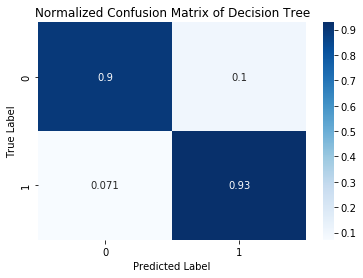

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       115
           1       0.81      0.93      0.87        56

    accuracy                           0.91       171
   macro avg       0.89      0.91      0.90       171
weighted avg       0.91      0.91      0.91       171



In [26]:
# feeding the training data into the model
tree.fit(X_train, Y_train)

# predicting the test set results
Y_pred = tree.predict(X_test)

# confusion matrix 
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

sum_mat1 = np.sum(cm, axis=1)
cm1 = cm/sum_mat1[:,None]
sns.heatmap(cm1, annot=True, cmap="Blues")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix of Decision Tree")
plt.savefig('10.png',facecolor='w')

plt.show()

#print(classification_report(Y_pred, Y_test))

print(classification_report(Y_test, Y_pred))



Training accuracy : 0.9874371859296482
Testing accuarcy : 0.9590643274853801
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       115
           1       0.92      0.96      0.94        56

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.95       171
weighted avg       0.96      0.96      0.96       171

[[110   5]
 [  2  54]]


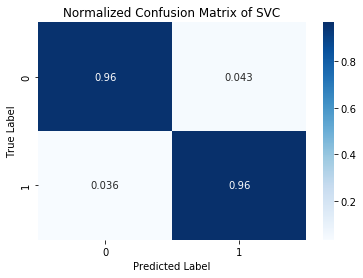

In [27]:
# Support Vector Machine

# creating a model
model = SVC()

# feedingthe training data into the model
model.fit(X_train, Y_train)

# predicting the test set results
Y_pred = model.predict(X_test)

# Calculating the accuracies
print("Training accuracy :", model.score(X_train, Y_train))
print("Testing accuarcy :", model.score(X_test, Y_test))

# classification report
cr = classification_report(Y_test, Y_pred)

print(cr)

# confusion matrix 
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

sum_mat1 = np.sum(cm, axis=1)
cm1 = cm/sum_mat1[:,None]
sns.heatmap(cm1, annot=True, cmap="Blues")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix of SVC")
plt.savefig('11.png',facecolor='w')

plt.show()


In [28]:
len(tree.feature_importances_)

30